In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./datasets', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./datasets', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


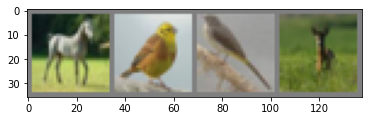

horse bird  bird  deer 


In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
net = Net().to(device)

cuda


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(400):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10000 == 9999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5wd}] loss: {running_loss / 2000:.3f}') #change 2000 > 10000
            running_loss = 0.0
        #I calculate wrongly
        #[398, 10000] loss: 2.537
        #[399, 10000] loss: 1.157
        #[400, 10000] loss: 2.653

print('Finished Training')

[1, 10000] loss: 5.169
[2, 10000] loss: 4.906
[3, 10000] loss: 4.654
[4, 10000] loss: 4.452
[5, 10000] loss: 4.288
[6, 10000] loss: 4.132
[7, 10000] loss: 3.981
[8, 10000] loss: 3.887
[9, 10000] loss: 3.795
[10, 10000] loss: 3.697
[11, 10000] loss: 3.604
[12, 10000] loss: 3.528
[13, 10000] loss: 3.452
[14, 10000] loss: 3.402
[15, 10000] loss: 3.344
[16, 10000] loss: 3.321
[17, 10000] loss: 3.279
[18, 10000] loss: 3.198
[19, 10000] loss: 3.207
[20, 10000] loss: 3.147
[21, 10000] loss: 3.142
[22, 10000] loss: 3.097
[23, 10000] loss: 3.076
[24, 10000] loss: 3.056
[25, 10000] loss: 3.088
[26, 10000] loss: 3.061
[27, 10000] loss: 2.973
[28, 10000] loss: 3.014
[29, 10000] loss: 3.014
[30, 10000] loss: 2.989
[31, 10000] loss: 2.947
[32, 10000] loss: 2.968
[33, 10000] loss: 2.958
[34, 10000] loss: 2.946
[35, 10000] loss: 2.964
[36, 10000] loss: 2.916
[37, 10000] loss: 2.991
[38, 10000] loss: 2.986
[39, 10000] loss: 2.902
[40, 10000] loss: 2.915
[41, 10000] loss: 2.989
[42, 10000] loss: 2.909
[

In [10]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

<All keys matched successfully>

Predicted:  cat   ship  ship  ship 


Accuracy of the network on the 10000 test images: 57 %
